# <font color=blue>**ANALYSE EN COMPOSANTES PRINCIPALES**

*Auteur : A. GHAZDALI*

# **1. Introduction**


1) Objectifs 

2) La réalisation de l’ACP

Pour réaliser une ACP on suit une démarche en plusieurs étapes :

1 Préparation des données

2 Paramétrer le logiciel 

3 Réaliser les calculs 

3) Interpréter les résultats 

1 Déterminer le nombre d’axes de l’analyse 

3 Sélectionner les individus et variables à interpréter

4 les sorties graphiques

4.1 La représentation des individus 

4.2 La représentation individus/variables 

## 1.1. Les ensembles de données à grande dimmension posent de nombreux défis dont :

* le problème de stockage et des ressources de calcul très coûteux en termes d'analyse ;

* le problème de surapprentissage (*overfiting*) dans des tâches de modélisation ;

* le fait que certains algorithmes, très utilisés en Machine Learning, ne peuvent pas traiter ce genre de données ;

* Corrélation entre différentes variables : problème de multicolinéarité ;

* le problème d'apprentissage du bruit dans les données ;

* Etc.

## 1.2. Objectifs 
Dans ce tutoriel, nous explorons ce qui est peut-être l'un des algorithmes le plus largement utilisés, [L’analyse en composante principale ACP](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales)
ou PCA (Principal component analysis). 

L'ACP est fondamentalement un algorithme de [réduction de
dimension,](https://fr.wikipedia.org/wiki/R%C3%A9duction_dimensionnelle)
largement utilisée en [statistique
descriptive](https://fr.wikipedia.org/wiki/Statistique_descriptive), pour visualiser sur un graphique à 2 ou 3 dimensions des données décrites sur plus de dimensions.  Mais elle peut également être utile comme outil de visualisation, de filtrage du bruit, d'extraction et d'ingénierie de caractéristiques (feature engineering), et bien plus encore.

Dans ce billet, nous chercherons
d’abord à comprendre le principe général avec l’exemple simple d’un
passage de 2 dimensions à 1 dimension. Puis nous détaillerons les bases
mathématiques sous-jacentes et comment réaliser cette transformation en
Python.

# 2. Mathématique de l’ACP

## 2.1. Tout commence avec un tableau
Chaque fois que je suis amené à analyser des données, mon premier réflexe et d'identifier un tableau ou chaque ligne représente une observation et chaque colonne une variable décrivant l'observation. Par exemple le tableau suivant, représente la taille et le poids chez 6 individus:

In [1]:
import numpy as np
import pandas as pd

ar = np.array([[51, 162], [64, 165], [60, 150], [90, 190], [95, 180], [85, 185]])
df = pd.DataFrame(ar, index = ['Individu 1', 'Individu 2', 'Individu 3', 'Individu 4', 'Individu 5', 'Individu 6'], columns = ['Taille', 'Poids'])

#Tableau de données avec 6 observations et deux variables.
df

,Taille,Poids
Individu 1,51,162
Individu 2,64,165
Individu 3,60,150
Individu 4,90,190
Individu 5,95,180
Individu 6,85,185


D’un point de vue géométrique, nous pouvons représenter chacune de ces 6
observations par un point (ou vecteur) dans un
[espace](https://fr.wikipedia.org/wiki/Dimension_d%27un_espace_vectoriel)
à 2 dimensions correspondant aux deux variables. Ce graphique nous
montre alors la proximité entre les observations. Par exemple sur le
graphique ci-dessous, les individus 1,2,3 et les individus 4,5,6 forment
respectivement deux groupes.

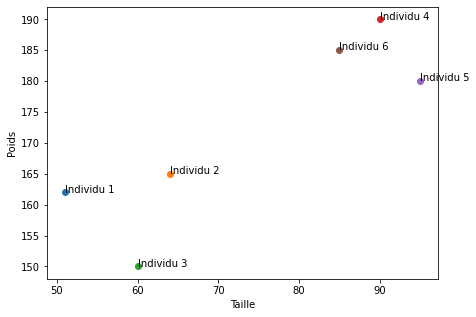

In [2]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(7,5)) # définir une figure de taille : 12 x 12

#placement des étiquettes des observations
for i in range(ar.shape[0]):
    plt.scatter(ar[i,0],ar[i,1])
    plt.annotate(df.index[i],(ar[i,0],ar[i,1]))
    
#ajouter les axes
plt.xlabel('Taille')
plt.ylabel('Poids')


#affichage
plt.show()

En ajoutant une nouvelle variable dans ce tableau, par exemple l'âge d'un individu, nous pouvons représenter les observations par un graphique à 3 dimensions. Mais avec plus de variables, et donc plus de dimensions cela devient problématique.
La solution à ce problème est la réduction de dimension en transformant par exemple un tableau à 10 variables vers un tableau à 2 variables facilement représentable sur un graphique.
Pour comprendre comment cette transformation fonctionne, partons d'un cas simple: La réduction d'un tableau à 2 dimensions vers un tableau à 1 dimension. Il suffira ensuite de généraliser cette méthode à N dimensions.

## 2.2. Passage de 2 dimensions à 1 dimension
Pour faire cette transformation, il faut s'imaginer un axe passant au mieux par tous les points. Puis faire la projection de chaque point sur cet axe. Cet axe ou composante principale est une nouvelle dimension fictive qui nous permet de représenter les observations sur 1 dimension. Et comme vous pouvez le constater sur le graphique ci-dessous, les deux groupes identifiables dans l'espace bidimensionnel l'est toujours dans ce nouvelle espace unidimensionnel.
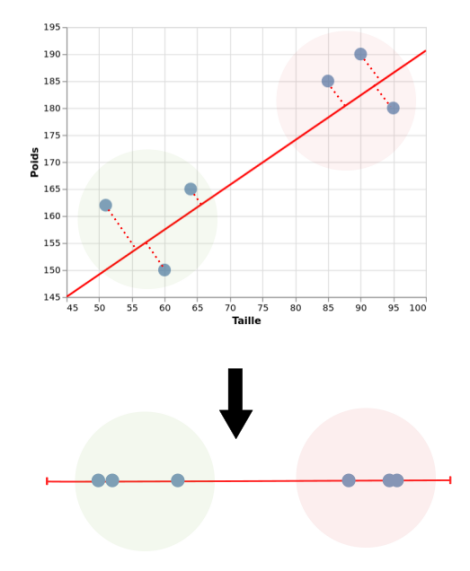
Réduction de dimensions d'un espace à 2 dimensions vers in espace à 1 dimension. Les deux groupes d'individus sont toujours identifiables.

Il faut cependant garder en tête qu'il y a une perte d'information lorsque l'on réalise cette transformation. Des données différentes avant transformation peuvent aboutir aux mêmes résultats. Plus les points sont corrélés entre eux, et plus l'information récupérée après la réduction de dimension sera grande. Une réduction de dimension par PCA doit donc TOUJOURS s'accompagner de la quantité d'information récupérée pour être interprétable.
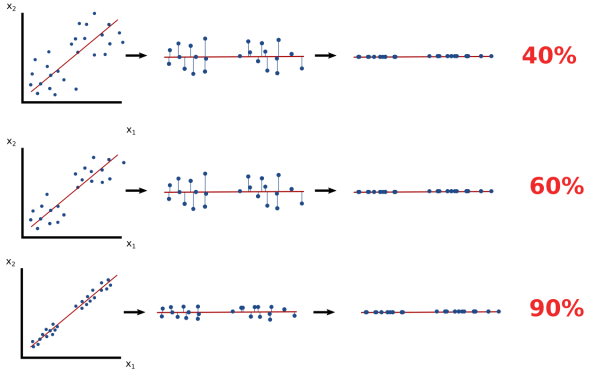
Réduction de dimensions d'un espace à 2 dimensions vers un espace à 1 dimensions. Dans les 3 exemples, la réduction de dimensions amène aux mêmes résultats. La différence est liée à la quantité d'information récupérée par la composante principale. Le premier graphique récupère que 40% de l'information tandisque la dernière récupère 90% de l'information.



## 3. Comprendre

Nous allons maintenant voir comment trouver ces axes par le calcul, pour
ensuite généraliser la méthode à N dimensions. Pour cela, quelque
prérequis d’[algèbre
linéaire](https://fr.wikipedia.org/wiki/Alg%C3%A8bre_lin%C3%A9aire) sont
nécessaires.

### 3.1. Transformation linéaire

En multipliant un [vecteur](https://fr.wikipedia.org/wiki/Vecteur)
$\vec{v}$ (un point) par une
[matrice](https://fr.wikipedia.org/wiki/Matrice) $M$ on obtient un
nouveau vecteur $\vec{v_t}$. Autrement dit, on déplace le point vers un
autre endroit grâce à une [matrice de
transformation](https://en.wikipedia.org/wiki/Transformation_matrix).

$$ 
\vec{v_t} = M \vec{v}
$$

Par exemple, en infographie, on utilise ces matrices pour réaliser
différente transformation d’objet comme des rotations, des déformations,
des agrandissements etc …  
Dans l’exemple ci-dessous, les 3 vecteurs (bleu, vert, rouge)
définissent un carré. En faisant le produit de chaque vecteur par une
matrice de transformation, on obtient 3 nouveaux vecteurs représentant
le carré transformé. Essayer  [ce
site](https://web.ma.utexas.edu/users/ysulyma/matrix/) pour tester.

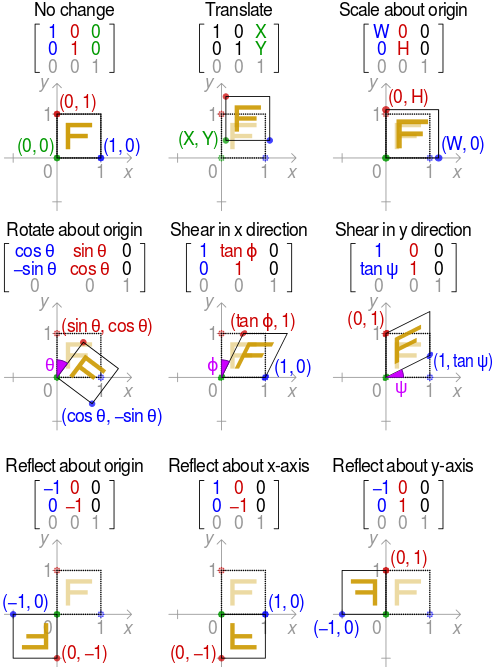


### 3.2. Vecteur propre et valeur propre

Les [vecteurs
propres](https://fr.wikipedia.org/wiki/Valeur_propre,_vecteur_propre_et_espace_propre)(eigen
vector) d’une matrice de transformation sont les vecteurs qui ne
changent pas de direction après transformation. Chacun de ces vecteurs
est associé à une [valeur
propre](https://fr.wikipedia.org/wiki/Valeur_propre,_vecteur_propre_et_espace_propre)
$\lambda$ (eigen value) indiquant le degré d’élongation.

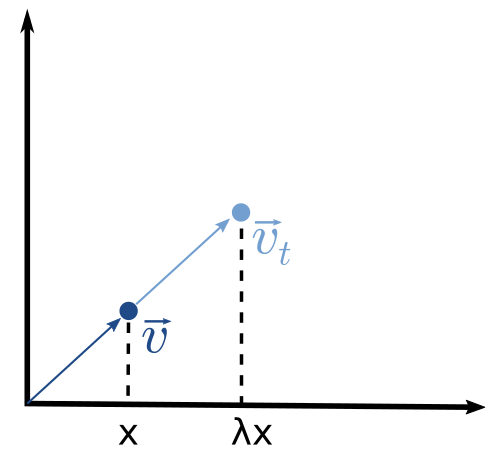



### 3.3. Calcul du vecteur et de la valeur propre

Pour trouver les vecteurs et valeurs propres d’une matrice A:

$$ A = \begin{bmatrix}
a & b \\ 
c & d 
\end{bmatrix}
$$

<center>
Il faut donc résoudre l’équation suivante.
</center>

$$A\vec{v} = \lambda \vec{v}$$

<center>
Ce qui revient à résoudre :
</center>

$$(A-\lambda I) \vec{v} = \vec{0}$$

<center>
Cette équation admet des solution(s) $\lambda$ si :
</center>

$$det(A-\lambda I) = 0 $$

<center>
C’est à dire :
</center>

$$ det (\begin{bmatrix}
a - \lambda & b \\ 
c & d - \lambda
\end{bmatrix}) = 0
$$

<center>
Pour trouver $\lambda$ il suffit donc de résoudre :
</center>

$$
(a - \lambda)(c - \lambda) - bc = 0
$$

En remplaçant lambda dans l’équation d’origine, nous trouvons alors les
vecteurs propres associés.  
Avant de comprendre en quoi les vecteurs propres sont utiles pour notre
réduction de dimension, il nous faut encore définir une chose: *la
matrice de covariance*.



### 3.4. Matrice de covariance

**La variance** d’une variable $x$, informe de la dispersion des données
autour de la moyenne. C’est la moyenne de tous les écarts à la moyenne
au carré. Elle s’écrit :

$$var(x) = \frac{1}{N} \sum_{i=0}^{n} (x-\bar{x})^{2}$$

Dans notre tableau, la variance de la taille et du poids sont
respectivement de 328.5 et 238.

**La covariance** entre deux variables indique la variance d’une
variable x par rapport à une variable y. Elle indique le degré de
corrélation entre deux variables. Elle s’écrit :

$$cov(x,y) = \frac{1}{N} \sum_{i=0}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

Plus les variables x et y sont corrélé, plus la valeur absolue de la
covariance est grande :
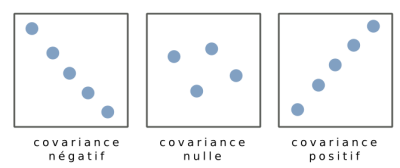
    
    
**La matrice de covariance** est une matrice carrée contenant l’ensemble
des covariances entre variables prises 2 à 2.

$$\Sigma = \begin{bmatrix}
cov(x,x) & cov(x,y) \\ 
cov(y,x) & cov(y,y) 
\end{bmatrix}$$


Généralement la matrice de covariance d'un vecteur de p variables aléatoires  ${x}={\begin{pmatrix}X_{1}\\\vdots \\x_{p}\end{pmatrix}}$ dont chacune possède une variance, est la matrice carrée dont le terme générique est donné par
$a_{i,j}={\textrm {Cov}}\left(x_{i},x_{j}\right)$. En développant les termes :

$$\Sigma=\begin{pmatrix}\operatorname {Var}(x_{1})&\operatorname {Cov}(x_{{1}},x_{{2}})&\cdots &\operatorname {Cov}(x_{{1}},x_{{p}})\\\operatorname {Cov}(x_{{2}},x_{{1}})&\ddots &\cdots &\vdots \\\vdots &\vdots &\ddots &\vdots \\\operatorname {Cov}(x_{{p}},x_{{1}})&\cdots &\cdots &\operatorname {Var}(x_{p})\end{pmatrix}$$

# 5. Algorithme d' ACP

L'analyse en composante principale pour des données numériques
en *n* dimensions est un algorithme non supervisé d'identification
des dimensions de variance décroissante et de changement de
base pour ne conserver que les *k* dimensions de plus grande variance.

Il consiste à :

- Centrer les données X → Y : Pour que G soit situé à l’origine (obligatoire)
- Réduire les données Y → Z : Pour rendre comparables les variables exprimées sur des échelles (unités) différentes (non obligatoire)
- Construire la matrice de covariance entre les variables :
   $\Sigma = \frac{1}{n-1}\sum_{i=1}^{n}{((X - \bar{x})'(X - \bar{x}))}$. 
- Trouver les valeurs propres $\lambda_i$ et vecteurs propres
   $v_i$ : $\Sigma v_i = \lambda_iv_i$, ces vecteurs propres
   forment un repère orthogonal de l'espace des données (en tant que
   vecteurs propres d'une matrice symmétrique qu'on supposera de rang n).
- Classer les valeurs propres (et les vecteurs associés) de façon
   décroissante :
   $\{\lambda_{(n)}, \lambda_{(n-1)}...\lambda_{(1)} \}$ où
   $\lambda_{(i)}$ est la i-ème variance dans l'ordre croissant.
- Ne conserver que les k ($k \leqslant n$) premiers vecteurs :
   $\{v_{(n)}, v_{(n-1)}...v_{(n-k+1)} \}$.
- Choisir le nombre k d’axes à retenir   
- Préciser le taux d’inertie expliqué par chacun des axes retenus
- Construire la matrice de projection dans l'espace de ces vecteurs
   (changement de base si *n=k*).  
- Projeter les données initiales dans cet espace de dimension *k*.   
- Représenter les individus dans le(s) repère(s) des axes principaux
- Tracer les cercles de corrélation
- Interpréter
   

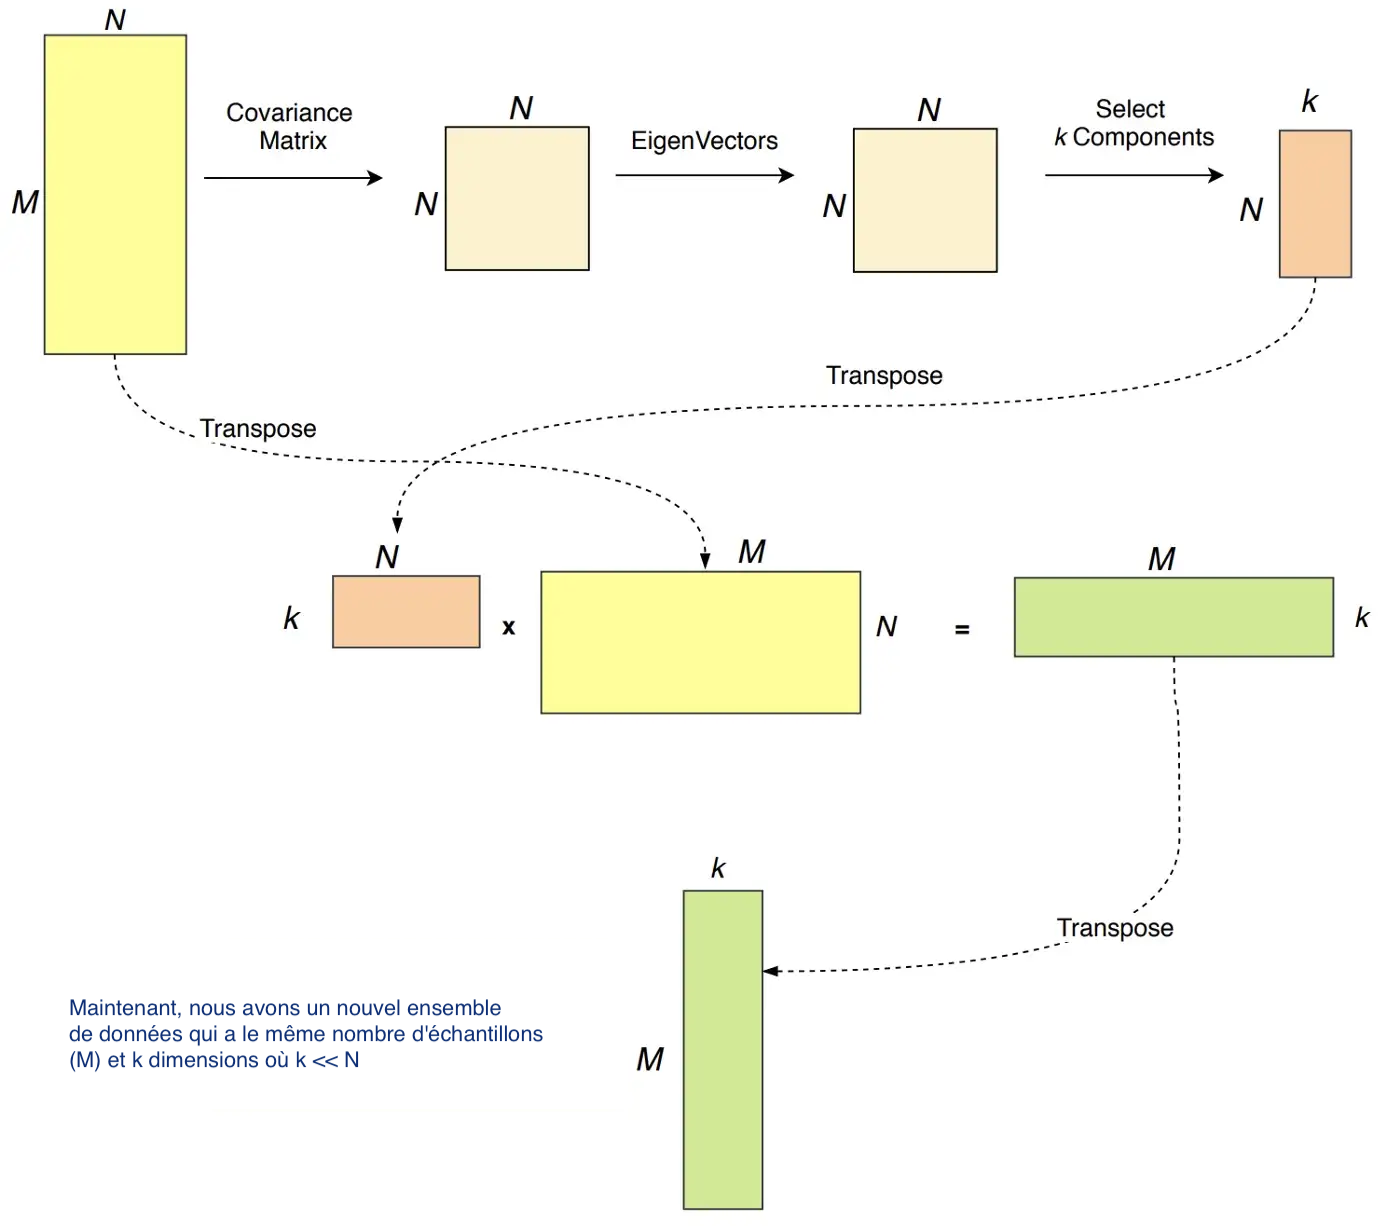

# 6. Réalisation de l’ACP

Passons à la pratique pour voir, en réalisant toutes ces opérations en Python.  
Tout cela peut bien sur être implémenté avec Numpy.  
Mais nous pouvons utiliser scikit-learn pour raccourcir l'implémentation et concentrer sur la visualisation des résultats.

## 6.1 Préparation des données

S’assurer que les données sont quantitatives. Dans la pratique, on considère souvent les variables qualitatives ordinales comme des quantitatives. Par exemple, dans les enquêtes de satisfaction les variables qualitatives ordinales possèdent les modalités suivantes : Pas du tout satisfait ; plutôt pas satisfait ; moyennement satisfait ; plutôt satisfait ; Tout à fait satisfait.On considère que ces modalités correspondent a une note donnée par l’individu avec 1 pour Pas du tout satisfait, 2 pour plutôt pas satisfait … et on obtient ainsi que variable quantitative discrète que l’on pourra utiliser en ACP.

Données manquantes : L’ACP ne sait pas traiter les données manquantes. Certains logiciels proposent de supprimer les individus possédant des données manquantes, alors que d’autres vont remplacer la donnée manquante par un zéro. 

### 6.1.1 Importer la table des données

On dispose d'un jeu de données de notes sont stockées dans un fichier csv **"notes.csv"**.

In [1]:
import numpy as np 
import pandas as pd

# tableau des données
MyData = pd.read_csv("notes.csv", header=0).set_index("Etudiant")
print(MyData)

X = MyData.values

            RO  Crypto   UML  PLSQL
Etudiant                           
Aymane    12.0    10.0  12.5   13.0
Adham     14.0    13.0  11.0   10.0
Ziyad     10.0    10.0  14.0   15.0
Youssef   12.0    13.0  15.5   16.0
Amina     14.5    14.5  15.0   15.0
Manal     11.0    10.0   8.0    7.0
Akram      7.0     8.0   8.0    8.5
Karim      6.0     7.0  14.0   13.5
Jihan     14.0    14.5  14.5   14.0


#### Centrer-réduire les valeurs (optionnel)
**i) Méthode de base sklearn**

Cette méthode prête à confusion : il semblerait que l'écart-type utilisé est celui d'une population et non d'un échantillon.

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xcr = scaler.transform(X)
print(Xcr)

[[ 0.2906191  -0.42894363  0.          0.18550354]
 [ 0.98810493  0.72920418 -0.55182541 -0.81621556]
 [-0.40686674 -0.42894363  0.55182541  0.85331627]
 [ 0.2906191   0.72920418  1.10365081  1.18722264]
 [ 1.16247639  1.30827808  0.91970901  0.85331627]
 [-0.05812382 -0.42894363 -1.65547622 -1.81793466]
 [-1.45309548 -1.20104217 -1.65547622 -1.31707511]
 [-1.8018384  -1.58709144  0.55182541  0.35245672]
 [ 0.98810493  1.30827808  0.73576721  0.5194099 ]]


**ii) Autre méthode sklearn**

In [109]:
from sklearn.preprocessing import scale
Xcr = scale(X)
print(Xcr)

[[ 0.2906191  -0.42894363  0.          0.18550354]
 [ 0.98810493  0.72920418 -0.55182541 -0.81621556]
 [-0.40686674 -0.42894363  0.55182541  0.85331627]
 [ 0.2906191   0.72920418  1.10365081  1.18722264]
 [ 1.16247639  1.30827808  0.91970901  0.85331627]
 [-0.05812382 -0.42894363 -1.65547622 -1.81793466]
 [-1.45309548 -1.20104217 -1.65547622 -1.31707511]
 [-1.8018384  -1.58709144  0.55182541  0.35245672]
 [ 0.98810493  1.30827808  0.73576721  0.5194099 ]]


**iii) Autre méthode, pour les dataframe (pandas) - on obtient ainsi un X au format dataframe.**

In [126]:
Xmean = np.mean(X, axis=0)
# Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
Xc = X-Xmean
Xstd = np.std(X, axis=0)
# Divisé les valeurs de la dataframe par l'écart-type de chaque colonne
Xcr = Xc/Xstd
print(Xcr)


[[ 0.2906191  -0.42894363  0.          0.18550354]
 [ 0.98810493  0.72920418 -0.55182541 -0.81621556]
 [-0.40686674 -0.42894363  0.55182541  0.85331627]
 [ 0.2906191   0.72920418  1.10365081  1.18722264]
 [ 1.16247639  1.30827808  0.91970901  0.85331627]
 [-0.05812382 -0.42894363 -1.65547622 -1.81793466]
 [-1.45309548 -1.20104217 -1.65547622 -1.31707511]
 [-1.8018384  -1.58709144  0.55182541  0.35245672]
 [ 0.98810493  1.30827808  0.73576721  0.5194099 ]]


#### Calcul de la matrice de covariance ou de correlation

In [188]:
# Si les données centrées on calcule 
# Matrice de covariance
matrice_covariance = pd.DataFrame(Xc, columns=MyData.columns, index=MyData.index).cov()
print(matrice_covariance)
X_cov = matrice_covariance.values

# Si les données centrées réduites on calcule
# Matrice de correlations
matrice_correlation = pd.DataFrame(Xcr, columns=MyData.columns, index=MyData.index).corr()
print(matrice_correlation)
X_cor = matrice_correlation.values

              RO    Crypto      UML      PLSQL
RO      9.250000  7.822917  2.78125   2.291667
Crypto  7.822917  7.548611  3.65625   3.319444
UML     2.781250  3.656250  8.31250   8.937500
PLSQL   2.291667  3.319444  8.93750  10.090278
              RO    Crypto       UML     PLSQL
RO      1.000000  0.936191  0.317178  0.237208
Crypto  0.936191  1.000000  0.461569  0.380347
UML     0.317178  0.461569  1.000000  0.975885
PLSQL   0.237208  0.380347  0.975885  1.000000


#### Calcul des vecteurs et valeurs Propres

In [183]:
from numpy import linalg as LA


# Calcul des vecteurs et valeurs propres de la matrice de covariance 
valeurs_propres, vecteurs_propres = LA.eig(X_cov)
print(valeurs_propres)

print(vecteurs_propres)

[23.28920187 11.30281271  0.42921296  0.18016135]
[[-0.45237006 -0.61727797 -0.64230655 -0.04208954]
 [-0.46328965 -0.45152116  0.75188808  0.12710493]
 [-0.5261063   0.39502544  0.04017854 -0.75203241]
 [-0.55130408  0.50897098 -0.14315129  0.64538365]]


##### Critères empiriques pour trouver le nombre de composantes principales à garder.

In [228]:
# Calcul de l'information récupéré en pourcentage
info_recupere  = (valeurs_propres / sum(valeurs_propres) * 100)
print(info)

[66.15989484 32.10899645  1.21930689  0.51180182]


###### Contrôler l'ACP par un diagramme de pareto

A l’ aide de l’affichage des valeurs propres et leurs cumulées on peut déterminer le nombre de composantes principales que l’on doit retenir.

i) Un diagramme de pareto permet de s'assurer que les composantes retenues retiendront bien la majorité de la variabilité.

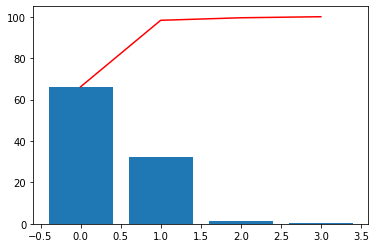

In [257]:

y = list(info_recupere)

x = range(len(y))

ycum = np.cumsum(y)

plt.bar(x,y)

plt.plot(x,ycum,"-r")

plt.show()

Remarque importante : pour qu'un pareto soit pertinent, il ne faut pas fixer le nombre de composante retenues sinon on ignore volontairement une partie de la variance perdu. Ici, si on avait eu plus de 4 variables, le choix de 2 composantes nous aurait conduit à négliger la variance des composantes au-delà de 2.

ii)  l’éboulis des valeurs propres

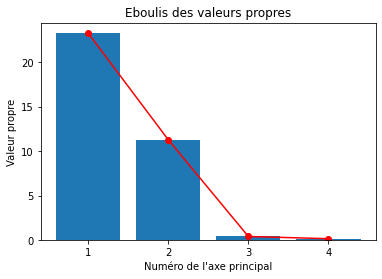

In [255]:
#éboulis des valeurs propres
plt.bar(np.arange(1,MyData.shape[1]+1),valeurs_propres)        
plt.plot(np.arange(1,MyData.shape[1]+1),valeurs_propres, 'ro-')
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,MyData.shape[1]+1)) 
plt.title("Eboulis des valeurs propres")
plt.ylabel("Valeur propre")
plt.xlabel("Numéro de l'axe principal")

plt.show()

iii) Inertie totale = $\sum_{i=1}^{p} \lambda_{i}$

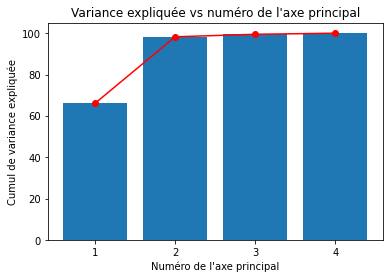

In [256]:
#cumul de variance expliquée
plt.figure(3)
plt.clf()
plt.bar(np.arange(1,MyData.shape[1]+1),np.cumsum(info_recupere))
plt.plot(np.arange(1,MyData.shape[1]+1),np.cumsum(info_recupere), 'ro-')
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,MyData.shape[1]+1)) 
plt.title("Variance expliquée vs numéro de l'axe principal")
plt.ylabel("Cumul de variance expliquée")
plt.xlabel("Numéro de l'axe principal")
plt.show()

##### Choisir 2 vecteurs propres dont les valeurs propres sont les plus élevées

In [ ]:
composants_principaux = vecteurs_propres[:,0:2]

# Calcul de l'information récupéré en pourcentage
axe1_info = info[0]
axe2_info = info[1]

# axe1_info est la part d’inertie expliquée par le 1er axe factoriel (ou 1ère composante)
print(axe1_info)

#### Construire un nouvel ensemble de données réduit

In [189]:
# Construire un nouvel ensemble de données réduit
# Projection des points sur les deux premiers vecteurs 
D = np.dot(X,composants_principaux)
print(D)

#ou

Newdata = MyData.dot(composants_principaux)
Newdata.columns = ["axe1", "axe2"]
print(Newdata)

[[-23.80461903  -0.36810646]
 [-23.65615641  -5.07667696]
 [-24.79164652   2.4769296 ]
 [-28.42671912   0.98931933]
 [-29.43822152  -1.93764103]
 [-17.67694613  -4.58226884]
 [-15.76784271  -0.44665819]
 [-20.76534121   5.53714846]
 [-28.39767925  -2.33548574]]
               axe1      axe2
Etudiant                     
Aymane   -23.804619 -0.368106
Adham    -23.656156 -5.076677
Ziyad    -24.791647  2.476930
Youssef  -28.426719  0.989319
Amina    -29.438222 -1.937641
Manal    -17.676946 -4.582269
Akram    -15.767843 -0.446658
Karim    -20.765341  5.537148
Jihan    -28.397679 -2.335486


#### La représentation des individus dans l’espace des 2 axes principaux d’inertie.
Maintenant, on represente le nuages des individus sur les 2 axes principaux avec Matplotlib.

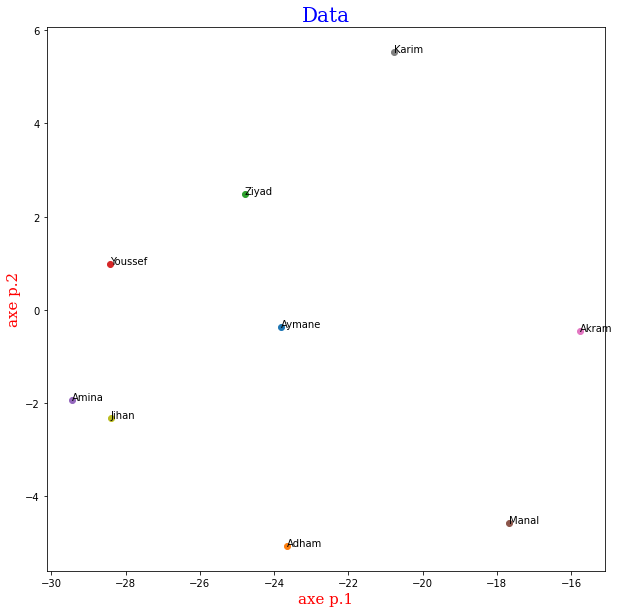

In [225]:
figure = plt.figure(figsize=(10,10)) # définir une figure de taille

#placement des étiquettes des observations
for i in range(MyData.shape[0]):
    plt.scatter(Newdata.values[i,0],Newdata.values[i,1])
    plt.annotate(MyData.index[i],(Newdata.values[i,0],Newdata.values[i,1]))

#ajouter les axes
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'red','size':15}

plt.title("Data", fontdict = font1)
plt.xlabel("axe p.1", fontdict = font2)
plt.ylabel("axe p.2", fontdict = font2)

#affichage
plt.show()


#### Calculer la qualité de la représentation des individus

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale


$ d_{i}^{2} = \sum_{j=1}^{p} z_{ij}^{2} $

In [235]:
di = np.sum(Xcr**2,axis=1) 
print(di)
pd.Series(di)

[0.30286366 2.47880921 1.38219312 3.24374089 4.63695621 6.23285896
 8.02927714 6.19421789 3.49908292]


0    0.302864
1    2.478809
2    1.382193
3    3.243741
4    4.636956
5    6.232859
6    8.029277
7    6.194218
8    3.499083
dtype: float64

Nous pouvons alors déduire la qualité de représentation des individus sur l’axe n°k avec :
     $$cos_{ik}^{2} = \frac{F_{ik}^{2}}{d_{i}^{2}} $$

In [242]:
cos2 = Newdata.values**2
print(cos2)

[[5.66659887e+02 1.35502363e-01]
 [5.59613736e+02 2.57726490e+01]
 [6.14625737e+02 6.13518023e+00]
 [8.08078360e+02 9.78752734e-01]
 [8.66608886e+02 3.75445274e+00]
 [3.12474425e+02 2.09971878e+01]
 [2.48624864e+02 1.99503537e-01]
 [4.31199395e+02 3.06600131e+01]
 [8.06428187e+02 5.45449365e+00]]


In [248]:
cos2 = Newdata.values**2
di2=di**2
for j in range(Newdata.shape[1]):
    cos2[:,j] = cos2[:,j]/di2
pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}, index=MyData.index)

,COS2_1,COS2_2
Etudiant,,
Aymane,6177.718749,1.477245
Adham,91.075626,4.194429
Ziyad,321.716467,3.211367
Youssef,76.799990,0.093021
Amina,40.304835,0.174615
Manal,8.043404,0.540489
Akram,3.856485,0.003095
Karim,11.238418,0.799097
Jihan,65.865384,0.445498


D'après le tableau ci-dessus, on remarque que les etudiants: Amina, Youssef, Akram, Jihan sont les plus bien représentés sur le 1er axe par rapport au autres. et les etudiants Adham, Ziyad et Karim sont les plus bien représentés sur le 2ème axe principal.

On remarque encore d'après le graph des nuages des individus qu'on trouve les étudiants Amina, Jihan et Akram sur les extrémités du 1er axe principale. on peut dire alors que, dans le graphe du nuages des individus, les individus les plus bien représentés sur un axes se trouves sur ses extrémités.

### Calcul de la PCA (en utilisant la singular value decomposition) :

Attention, par défaut, cette fonction centre les variables mais ne les réduit pas ! Si les unités de chaque variable sont différentes, il faut réduire les données :

** Quelques paramètres pris en entrée :
* **n_components** : le nombre d'axes à conserver (par défaut, tous). On peut aussi donner le pourcentage (entre 0 et 1) de la variance à expliquer, on aura le nombre mimimum d'axes à conserver.
* **random_state** : le fixer si on veut des résultats reproductibles.

** Champs produits dans l'objet pca (de type sklearn.decomposition.pca.PCA), à accéder :
* **n_components_** : le nombre d'axes conservés.
* **explained_variance_** : les variances selon chaque axe principal, triées par ordre décroissant.
* **explained_variance_ratio_** : les ratios de la variance expliquée sur la variance totale pour chaque axe principal, ceux-ci étant triés par ordre de valeur propre décroissante (si tous les axes principaux gardés, la somme vaut 1)
* **singular_values_** : les valeurs propres, par ordre décroissant.
* components_ : une matrice nombre d'axes principaux x nombre de features, donc chaque ligne sont les coefficients de la combinaison linéaire de l'axe correspondant (les vecteurs lignes sont les vecteurs propres, orthogonaux entre eux et tous de norme 1).
* **pca.transform( X )** : les coordonnées des points transformés sur les axes principaux (un point par ligne). C'est en fait numpy.dot(iris.data, pca.components_.T).
* **pca.inverse_transform( X )** : transformation inverse, des axes de la PCA vers les axes d'origine. Si on a conservé tous les axes, 
* **pca.inverse_transform(pca.transform( X ))** redonne la matrice d'origine.
* **pc1 = X @ pca.components[0,:]; pc2 = X @ pca.components[1,:]; pyplot.scatter(pc1, pc2)**: projection sur les 2 premières dimensions.


** Exemple 

from sklearn.decomposition import PCA  
mypca = PCA(n_components=3) # On paramètre ici pour ne garder que 3 composantes  
**Modèle d'ACP**  
mypca.fit(X)  
**Pourcentage de la variance expliquée par chacune des composantes sélectionnées.**  
print(mypca.singular_values_) # Valeurs de variance  
print(mypca.explained_variance_ratio_) #  Pourcentages  
**Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.**  
print(mypca.components_)  
**Résultats de l'ACP**  
data_sortie= mypca.fit_transform(X)  
**Bruit estimé lié à la covariance**  
print(mypca.noise_variance_)

** Cercle des corrélations :

**an = numpy.linspace(0, 2 * numpy.pi, 100)**  
**pyplot.plot(numpy.cos(an), numpy.sin(an))**  
**for i in range(X.shape[1]):**  
**x = numpy.corrcoef(pc1, X[:,i])[0, 1]**  
**y = numpy.corrcoef(pc2, X[:,i])[0, 1]**  
**pyplot.annotate('', xy = (x, y), xytext = (0,0), arrowprops = **  
**{'arrowstyle': '->'})**  
**pyplot.annotate(featureNames[i], xy = (x + 0.02, y + 0.02))**  
**pyplot.axis('equal')**

## Analyse en composante principale en Python

Nous allons utiliser le [jeux de données
iris](https://fr.wikipedia.org/wiki/Iris_de_Fisher) contenant 50
observations de fleurs et 4 variables (ou 4 dimensions) et les réduire
sur une espace à deux dimensions.


Réduction d’un espace à 4 dimensions vers un espace à 2 dimensions.

Ce graphique représente donc la projection d’observation d’un espace à 4
dimensions vers un espace à deux dimensions. Ces 2 axes sont accompagnés
du pourcentage d’information récupéré grâce aux valeurs propres. Le
premier axe récupère 92,46% de l’information puis le second récupère
5.31%. Au total, les 2 premiers axes ont récupéré plus de 97% de
l’information. Et comme les couleurs nous le montre, nous constatons que
les fleurs de la même espèce sont à proximité dans cette espace
bidimensionnel.



## Conclusion

Nous avons vu dans ce billet, comment réaliser une analyse en composante
principale pas à pas. Bien entendu, il existe des librairies permettant
de réaliser cette transformation en une ligne, comme [ici avec
sklearn](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html).
Mais, c’est toujours bien de comprendre comment ça marche ! Par
ailleurs, l’analyse en composante principale est une méthode parmi
d’autres, de réduction de dimension. Il en existe d’autres avec chacune
leurs avantages. Notamment des méthodes non linéaires comme
[t-SNE](https://fr.wikipedia.org/wiki/Algorithme_t-SNE) ou
[UMAP](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction).
Sachez aussi que la PCA a d’autres applications en informatique,
notamment dans le traitement d’image, la compression et la réduction du
bruit. En effet si vous faites une PCA sur une image, vous récupérer le
maximum d’information utile sans le bruit. En faisant l’inverse d’une
PCA, vous reconstituerez alors une image débruitée.

In [63]:
# sklearn has built-in iris dataset
# load and store it as numpy array for further matrix calculations in PCA
from sklearn import datasets
import numpy as np

dataNotes = pd.read_csv("notes.csv", header=0).set_index("Etudiant")


X = dataNotes.values
print(X)

[[12.  10.  12.5 13. ]
 [14.  13.  11.  10. ]
 [10.  10.  14.  15. ]
 [12.  13.  15.5 16. ]
 [14.5 14.5 15.  15. ]
 [11.  10.   8.   7. ]
 [ 7.   8.   8.   8.5]
 [ 6.   7.  14.  13.5]
 [14.  14.5 14.5 14. ]]


In [133]:
# Calculer la matrice de covariance
# numpy has an API to calculate a covariance matrix
# y-axes will be used for calculations

# Matrice de covariance
X_cov = np.cov(X, rowvar=False)
#ou
matrice_ovariance = pd.DataFrame(R, columns=dataNotes.columns, index=dataNotes.index).cov()
print(X_cov)
print(matrice_ovariance)

# Matrice de correlations
matrice_correlation = pd.DataFrame(X, columns=dataNotes.columns, index=dataNotes.index).corr()
print(matrice_correlation)


[[ 9.25        7.82291667  2.78125     2.29166667]
 [ 7.82291667  7.54861111  3.65625     3.31944444]
 [ 2.78125     3.65625     8.3125      8.9375    ]
 [ 2.29166667  3.31944444  8.9375     10.09027778]]
              RO    Crypto      UML      PLSQL
RO      9.250000  7.822917  2.78125   2.291667
Crypto  7.822917  7.548611  3.65625   3.319444
UML     2.781250  3.656250  8.31250   8.937500
PLSQL   2.291667  3.319444  8.93750  10.090278
              RO    Crypto       UML     PLSQL
RO      1.000000  0.936191  0.317178  0.237208
Crypto  0.936191  1.000000  0.461569  0.380347
UML     0.317178  0.461569  1.000000  0.975885
PLSQL   0.237208  0.380347  0.975885  1.000000


In [75]:
# Calculer les valeurs propres et les vecteurs propres
# numpy linear algebra module eig() api
# Compute the eigenvalues and eigenvectors of a square array
eig_values, eig_vectors = np.linalg.eig(X_cov)

# print values and corresponding vectors
eig_values
eig_vectors

array([[-0.45237006, -0.61727797, -0.64230655, -0.04208954],
       [-0.46328965, -0.45152116,  0.75188808,  0.12710493],
       [-0.5261063 ,  0.39502544,  0.04017854, -0.75203241],
       [-0.55130408,  0.50897098, -0.14315129,  0.64538365]])

In [76]:
# Choisissez les composants principaux
# Construire un nouvel ensemble de données réduit
# pick 2 eigenvectors whose eigenvalues are highest
featureVector = eig_vectors[:,:2]
featureVector

array([[-0.45237006, -0.61727797],
       [-0.46328965, -0.45152116],
       [-0.5261063 ,  0.39502544],
       [-0.55130408,  0.50897098]])

In [77]:
# Construire un nouvel ensemble de données réduit
featureVector_t = np.transpose(featureVector)

# R is the original iris dataset
R_t = np.transpose(R)

newDataset_t = np.matmul(featureVector_t, R_t)
newDataset = np.transpose(newDataset_t)

# check the shape of new reduced 2D dataset
newDataset.shape

(9, 2)

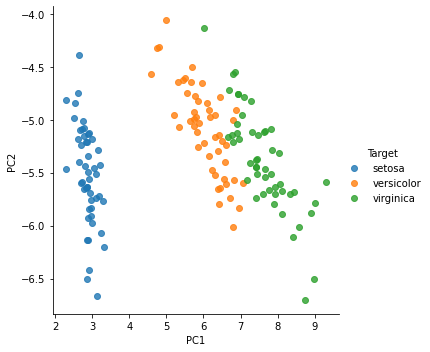

In [36]:
import seaborn as sns
import pandas as pd
%matplotlib inline

# create new DataFrame
df = pd.DataFrame(data=newDataset, columns=['PC1', 'PC2'])
y = pd.Series(iris.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virginica')
df['Target'] = y 

# plot 2D data
sns.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg=False, legend=True)